In [64]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec as gs
from scipy import cluster as scl

In [25]:
%matplotlib inline

In [26]:
# Set path
path_root = '/scratch/yassinebha/pleio/pleio_all_tasks/'
path_pleio = os.path.join(path_root,'pleio_2018-07-26')


In [30]:
# Load variables
## Spatial subtypes from all tasks (90 tasks)
spatial_subt_df = pd.read_csv(os.path.join(path_root,'all_subtype_stack.csv'))

## Subjects weigts from all subtypes tasks  (90 tasks)
weight_subt_df = pd.read_csv(os.path.join(path_root,'subtype_weights_all_tasks.csv'))

## Subject weights and covariates (age,gender,FD,BMI)
weight_subt_cov_df = pd.read_csv(os.path.join(path_root,'pleio_all_pheno.csv'))

## Genetic correlation matrix of subtypes weights
RhoG = np.load(os.path.join(path_pleio, 'RhoG.npy'))

## FDR of genetic corrrelation matrix
RhoG_fdr =  np.load(os.path.join(path_pleio, 'RhoG_pval_0.npy'))


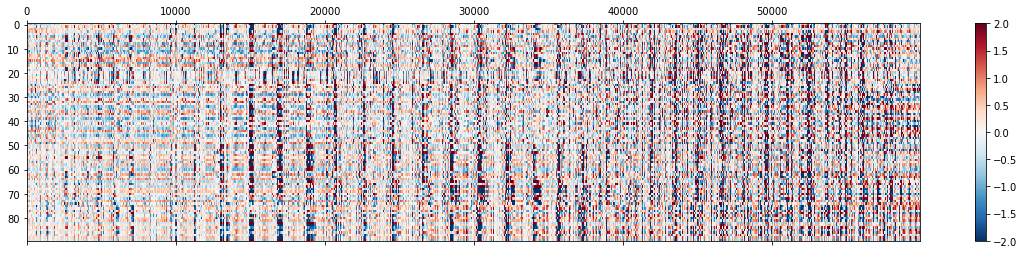

In [55]:
# Plot spatial subtypes stack

f = plt.figure(figsize=(20,4))
ax = f.add_subplot(111)
p = ax.matshow(spatial_subt_df.values.T, aspect='auto', vmin=-2, vmax=2, cmap=plt.cm.RdBu_r)
plt.colorbar(p)


In [44]:
weight_subt_df.drop(columns='ID')

,EMO_contrast_fear_vs_neut_sub1,EMO_contrast_fear_vs_neut_sub2,EMO_contrast_fear_vs_neut_sub3,EMO_contrast_fear_vs_neut_sub4,EMO_contrast_fear_vs_neut_sub5,SOC_mental_sub1,SOC_mental_sub2,SOC_mental_sub3,SOC_mental_sub4,SOC_mental_sub5,...,WM_0bk_sub1,WM_0bk_sub2,WM_0bk_sub3,WM_0bk_sub4,WM_0bk_sub5,LAN_story_sub1,LAN_story_sub2,LAN_story_sub3,LAN_story_sub4,LAN_story_sub5
0,-0.228,0.027,0.175,0.152,-0.016,-0.140,-0.093,-0.241,0.138,0.261,...,0.354,0.080,0.210,-0.246,-0.391,0.049,-0.063,0.084,-0.134,0.040
1,0.458,-0.186,-0.551,-0.372,0.310,0.385,0.049,0.621,-0.466,-0.612,...,0.146,-0.543,0.755,-0.742,-0.227,-0.547,0.570,-0.522,-0.197,0.317
2,-0.534,0.098,0.587,0.464,-0.258,-0.141,0.110,-0.154,0.076,0.157,...,-0.451,0.095,-0.463,0.507,0.474,0.060,-0.038,0.053,-0.003,-0.056
3,-0.005,-0.287,-0.163,-0.092,0.340,0.273,0.180,0.196,-0.318,-0.244,...,0.324,0.706,-0.493,0.434,-0.342,-0.323,0.290,-0.301,-0.224,0.314
4,0.033,0.073,0.003,-0.017,-0.067,0.307,0.046,0.189,-0.226,-0.251,...,-0.107,-0.543,0.541,-0.511,0.070,-0.004,-0.032,0.025,-0.042,0.055
5,-0.365,-0.137,0.271,0.335,0.046,-0.430,-0.095,-0.114,0.356,0.208,...,-0.190,0.058,-0.268,0.278,0.266,0.351,-0.394,0.299,0.390,-0.271
6,-0.144,-0.501,-0.118,0.143,0.458,-0.122,-0.066,0.160,0.088,-0.104,...,-0.351,-0.279,0.019,0.018,0.392,0.447,-0.408,0.493,0.099,-0.377
7,0.047,-0.007,-0.090,-0.056,0.061,0.190,-0.092,0.338,-0.198,-0.315,...,0.284,-0.103,0.351,-0.371,-0.326,-0.033,0.020,-0.086,0.031,0.068
8,0.207,0.410,-0.051,-0.235,-0.281,0.179,0.092,0.150,-0.225,-0.170,...,0.213,-0.116,0.305,-0.317,-0.250,-0.019,-0.022,0.033,-0.202,0.138
9,-0.065,0.148,0.060,-0.054,-0.054,-0.057,0.021,-0.105,0.092,0.090,...,-0.118,-0.383,0.348,-0.319,0.087,0.022,-0.020,0.025,-0.165,0.073


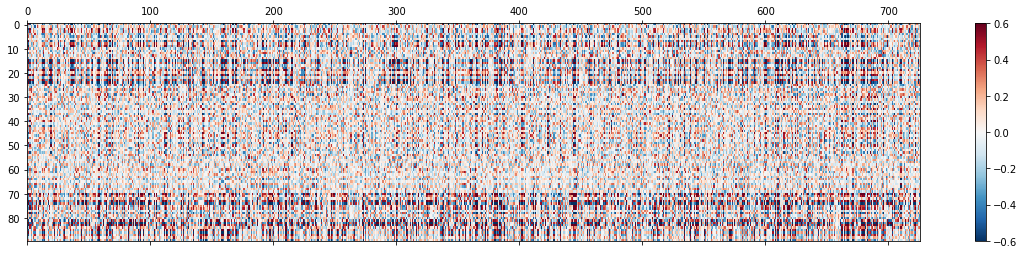

In [52]:
# Plot subtypes weights stack

f = plt.figure(figsize=(20,4))
ax = f.add_subplot(111)
p = ax.matshow(weight_subt_df.drop(columns='ID').values.T, aspect='auto', vmin=-0.6, vmax=0.6, cmap=plt.cm.RdBu_r)
plt.colorbar(p)


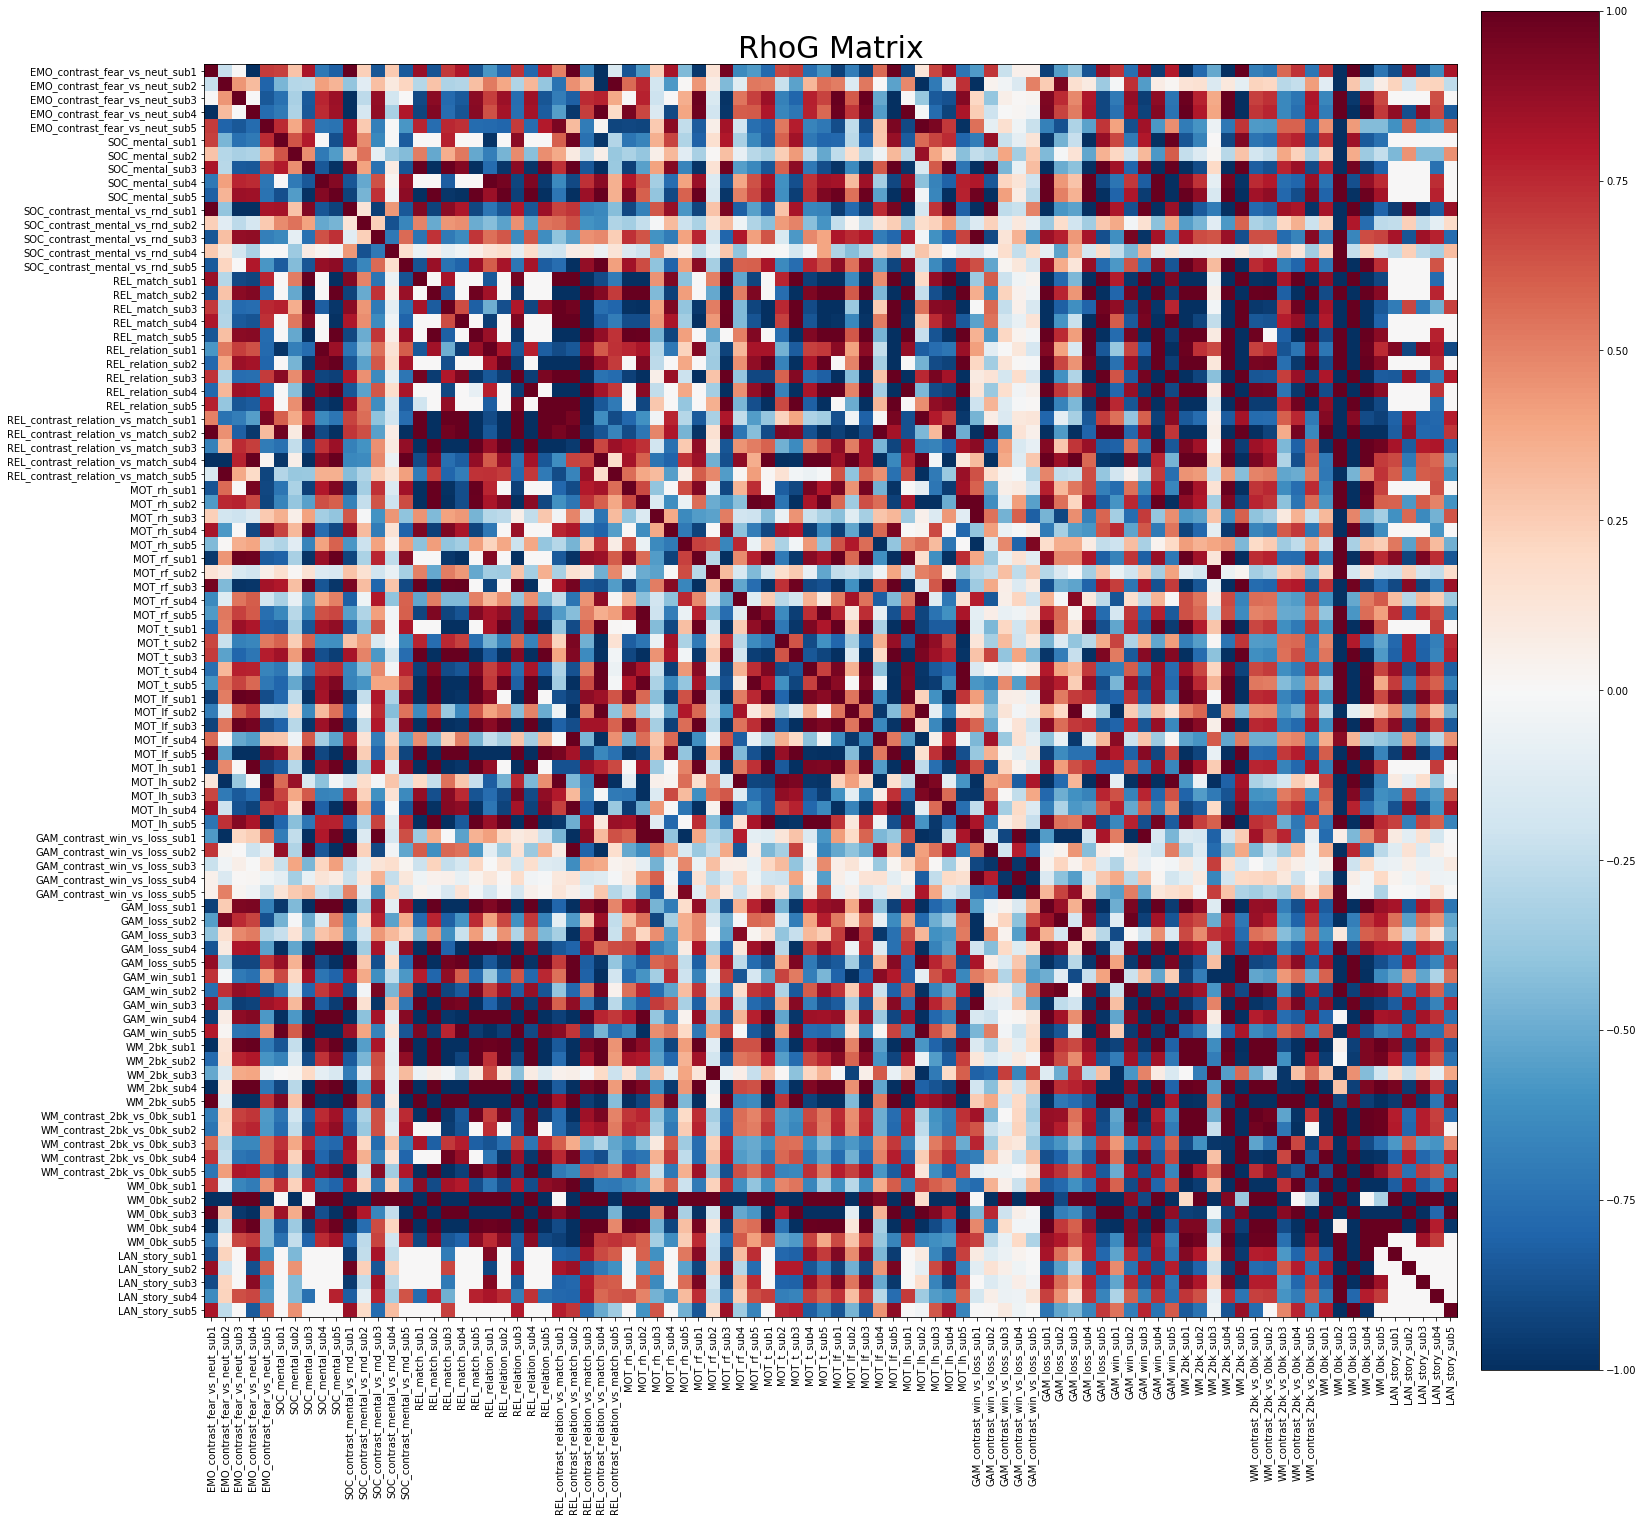

In [63]:
# Plot RhoG matrix
subt_name = weight_subt_df.columns.drop('ID').tolist()
gsp = gs.GridSpec(1, 10)
f = plt.figure(figsize=(25,25))
ax = f.add_subplot(gsp[0,:9])
axcl = f.add_subplot(gsp[0,9])
p = ax.imshow(RhoG,cmap =plt.cm.RdBu_r,interpolation='none')
ax.set_yticks(range(len(subt_name)))
ax.set_yticklabels(subt_name)
ax.set_xticks(range(len(subt_name)))
ax.set_xticklabels(subt_name, rotation=90)
ax.set_title('RhoG Matrix',fontsize=30)
f.colorbar(p, cax=axcl)

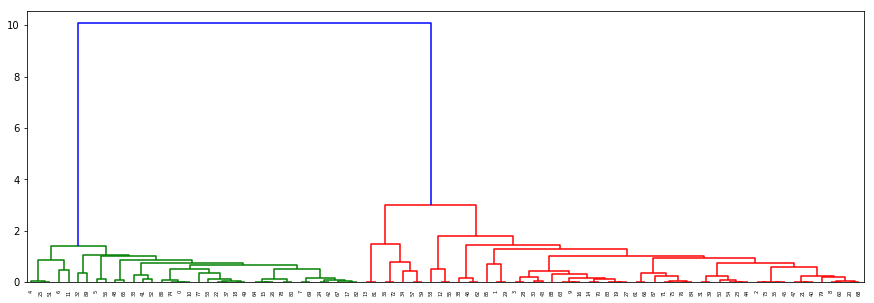

In [65]:
## Cluster rhoG matrix
# Number of subtypes
n_sbt = 8
# hierachical clustering
svec = RhoG[np.triu_indices(len(RhoG),1)]
dist = 1 - svec
link = scl.hierarchy.linkage(dist, method='ward')
part = scl.hierarchy.fcluster(link, n_sbt, criterion='maxclust')
order = scl.hierarchy.dendrogram(link, no_plot=True)['leaves']
plt.figure(figsize=(15, 5))
dn = scl.hierarchy.dendrogram(link)

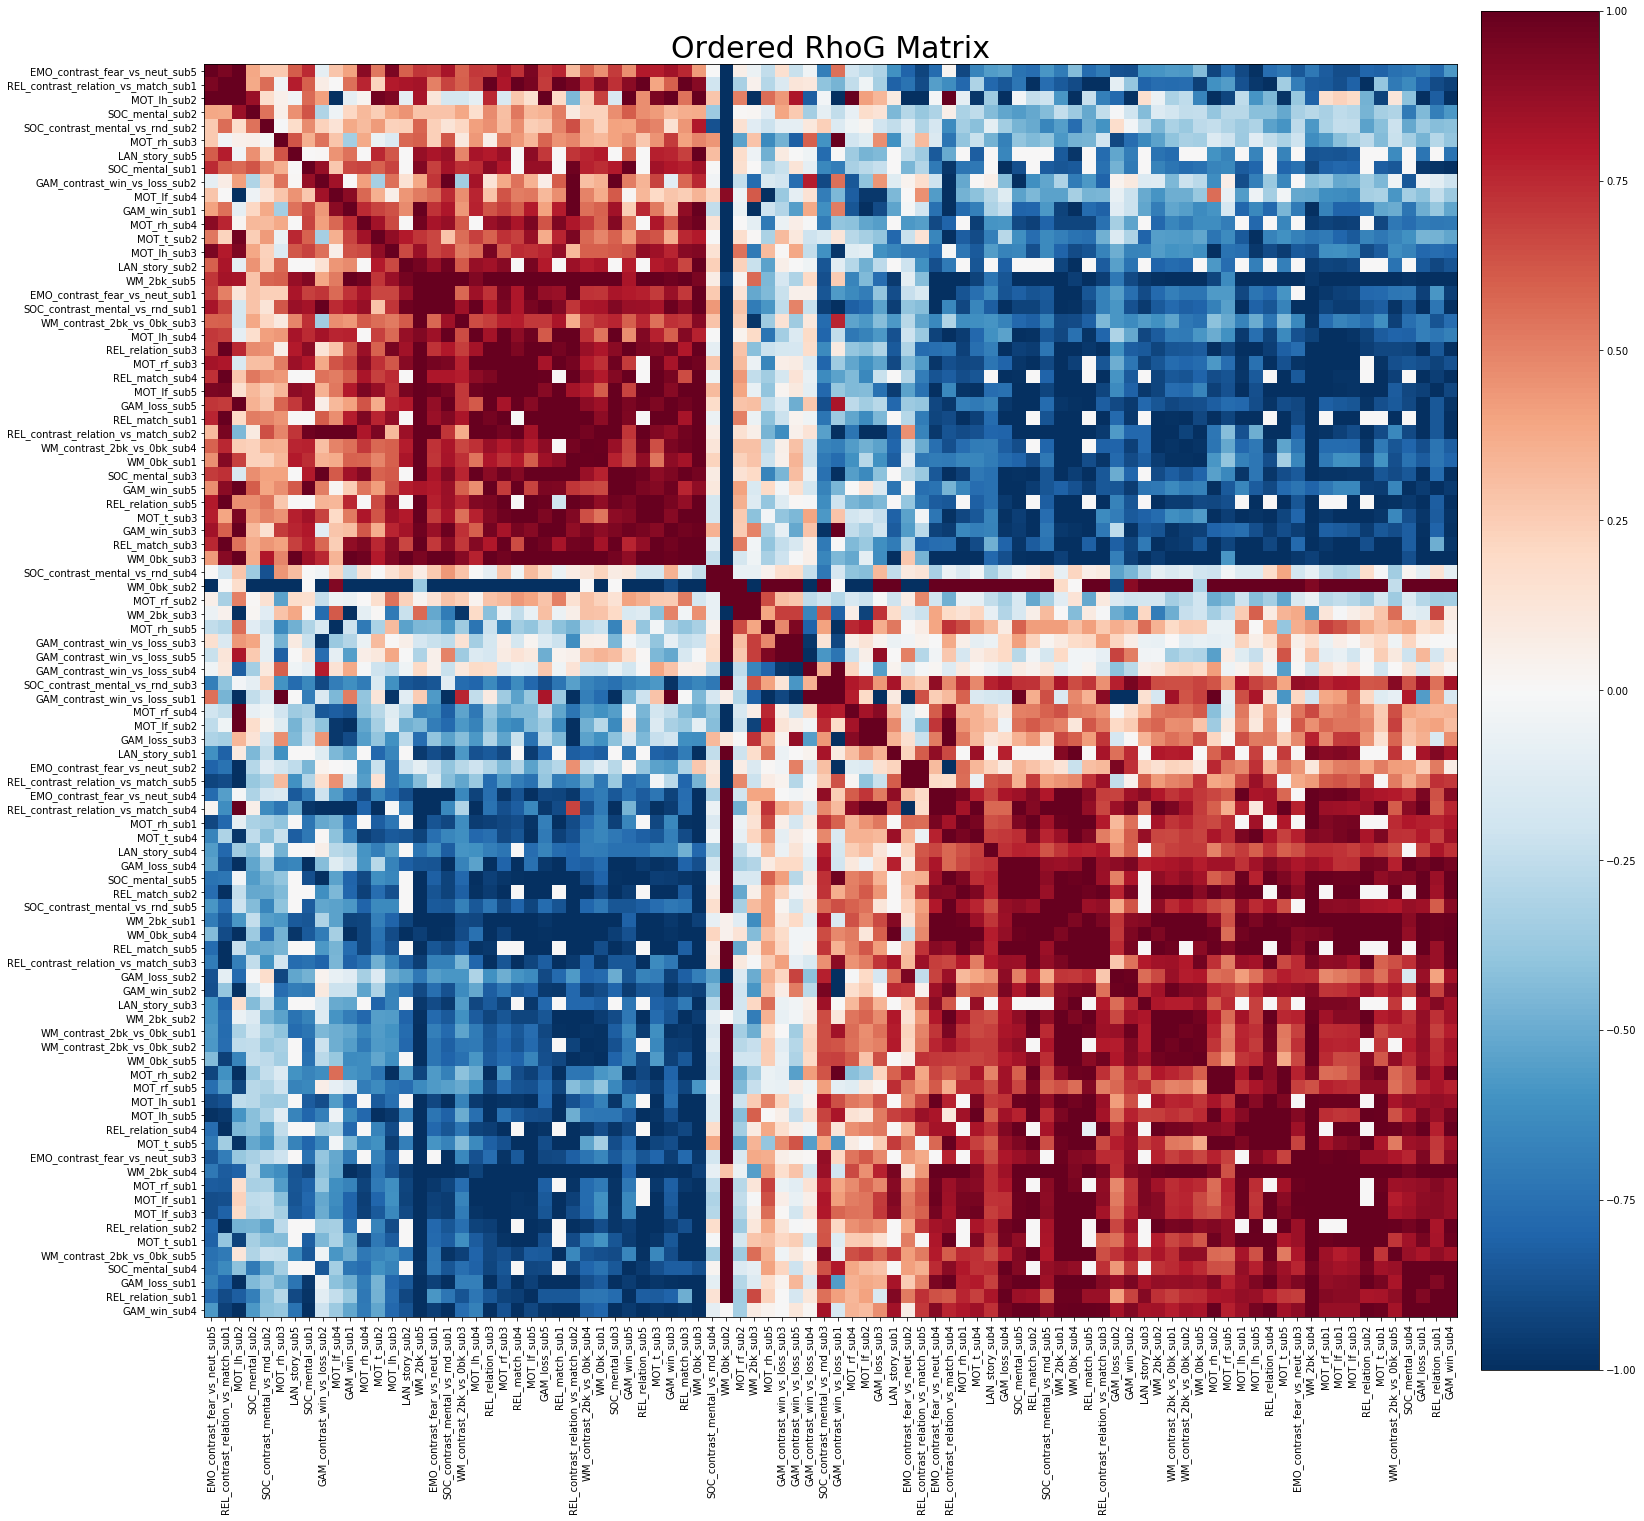

In [66]:
# Plot RhoG ordered by hierarchy
subt_name = weight_subt_df.columns.drop('ID').tolist()
subt_name_order = [subt_name[ord] for ord in order]

gsp = gs.GridSpec(1, 10)
f = plt.figure(figsize=(25,25))
ax = f.add_subplot(gsp[0,:9])
axcl = f.add_subplot(gsp[0,9])
p = ax.imshow(RhoG[order, :][:, order],cmap =plt.cm.RdBu_r,interpolation='none')
ax.set_yticks(range(len(subt_name)))
ax.set_yticklabels(subt_name_order)
ax.set_xticks(range(len(subt_name)))
ax.set_xticklabels(subt_name_order, rotation=90)
ax.set_title('Ordered RhoG Matrix',fontsize=30)
f.colorbar(p, cax=axcl)